In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import data
!pip install gdown

# Download dataset
!gdown --id 1bbyqVCKZX5Ur5Zg-uKj0jD0maWAVeOLx

# Unzip the dataset
!unzip /content/CarDD_release.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000371.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000372.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000373.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000374.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000375.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000377.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000379.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000380.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000382.png  
  inflating: /content/dataset/CarDD_release/CarDD_SOD/CarDD-TR/CarDD-TR-Mask/000383.png  
  inflating: /content/dataset/CarDD_release/CarDD

In [ ]:
#Move the data to a yolo compatible folder structure
import os

# Define target directories
train_dir = '/content/yoloDataset/train/images'
train_label_dir = '/content/yoloDataset/train/labels'
val_dir = '/content/yoloDataset/val/images'
val_label_dir = '/content/yoloDataset/val/labels'

# Ensure directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Move the data to the YOLO-compatible folder structure
!mv '/content/dataset/CarDD_release/CarDD_COCO/train2017/' '/content/yoloDataset/train/images'
!mv '/content/dataset/CarDD_release/CarDD_COCO/val2017/' '/content/yoloDataset/val/images'

#Copy labels from drive
!cp -r '/content/drive/MyDrive/DamageDetection/coco_converted2/labels/train2017/' '/content/yoloDataset/train/labels'
!cp -r '/content/drive/MyDrive/DamageDetection/coco_converted2/labels/val2017/' '/content/yoloDataset/val/labels'


In [ ]:
#Copy labels from drive
!cp -r '/content/drive/MyDrive/DamageTypesegmentation/PreProcessedDataset/' '/content/yoloDataset/'

In [ ]:
#Install Ultralyrics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 48.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

#loading the model
model = YOLO('yolov8n-seg.pt')

#Train the model
result = model.train(
    data="/content/yoloDataset/PreProcessedDataset/config.yaml",
    epochs=10,
    imgsz=960,
    lr0=0.01,
    patience=10,
    weight_decay=0.0005,
    workers=8,
    batch=16
)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/yoloDataset/PreProcessedDataset/config.yaml, epochs=10, time=None, patience=10, batch=16, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 77.0MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 308MB/s]


AMP: checks passed ✅


train: Scanning /content/yoloDataset/PreProcessedDataset/labels/train... 2802 images, 14 backgrounds, 30 corrupt: 100%|██████████| 2816/2816 [00:03<00:00, 906.01it/s]

train: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/train/000133.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0997]
train: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/train/000135.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0356]
train: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/train/000173.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0256]
train: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/train/000201.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0644]
train: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/train/000232.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0314]
train: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/train/000249.jpg: ignoring corrupt image/label: non-normalized or out of b

train: New cache created: /content/yoloDataset/PreProcessedDataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/yoloDataset/PreProcessedDataset/labels/val... 810 images, 0 backgrounds, 6 corrupt: 100%|██████████| 810/810 [00:01<00:00, 622.87it/s]

val: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/val/000971.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.104]
val: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/val/002098.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.025]
val: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/val/003073.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0614]
val: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/val/003074.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3003]
val: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/val/003373.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1388]
val: WARNING ⚠️ /content/yoloDataset/PreProcessedDataset/images/val/003896.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     

val: New cache created: /content/yoloDataset/PreProcessedDataset/labels/val.cache
Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to runs/segment/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.99G      3.043      5.315      5.911      3.234         10        960: 100%|██████████| 175/175 [00:53<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]


                   all        804       1738      0.859     0.0404     0.0217     0.0089      0.857     0.0354     0.0174    0.00642

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.18G      2.746      4.911       4.99      3.025          3        960: 100%|██████████| 175/175 [00:48<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]


                   all        804       1738      0.777     0.0627     0.0623     0.0277      0.778     0.0471     0.0532     0.0205

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.02G       2.58      4.885      4.518      2.986          5        960: 100%|██████████| 175/175 [00:48<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]


                   all        804       1738      0.868     0.0521      0.036     0.0187      0.866     0.0467     0.0309     0.0125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.05G      2.516      4.855      4.299      2.942          5        960: 100%|██████████| 175/175 [00:48<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]


                   all        804       1738      0.829      0.116     0.0682     0.0308      0.801      0.104      0.059     0.0217

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.98G      2.508      4.838      4.193      2.915          7        960: 100%|██████████| 175/175 [00:47<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]


                   all        804       1738      0.589      0.104     0.0708     0.0318      0.588      0.103     0.0668     0.0252

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.05G      2.465      4.807      4.141      2.876          4        960: 100%|██████████| 175/175 [00:47<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.68it/s]


                   all        804       1738      0.552      0.104     0.0536      0.022      0.551     0.0978     0.0506     0.0207

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.06G      2.413      4.795      4.072      2.835          5        960: 100%|██████████| 175/175 [00:47<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.73it/s]


                   all        804       1738      0.757      0.129      0.106     0.0583      0.759      0.118     0.0943     0.0404

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.02G      2.396      4.769      4.022      2.823          3        960: 100%|██████████| 175/175 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.68it/s]


                   all        804       1738      0.609      0.168     0.0936     0.0474      0.596       0.15     0.0796     0.0327

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.09G      2.363      4.733      3.953      2.795          2        960: 100%|██████████| 175/175 [00:47<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.77it/s]


                   all        804       1738      0.606      0.172     0.0954     0.0473      0.599      0.161     0.0852     0.0362

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.02G      2.343       4.71      3.911      2.759          2        960: 100%|██████████| 175/175 [00:47<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.77it/s]


                   all        804       1738      0.615      0.176      0.107     0.0536      0.603      0.155     0.0898     0.0359

10 epochs completed in 0.167 hours.
Optimizer stripped from runs/segment/train2/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train2/weights/best.pt, 6.8MB

Validating runs/segment/train2/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,234 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]


                   all        804       1738      0.755      0.128      0.106     0.0583      0.759      0.118     0.0943     0.0402
                  dent        352        501          1          0    0.00387    0.00117          1          0    0.00177   0.000408
               scratch        430        727          1          0    0.00616    0.00163          1          0    0.00119   0.000275
                 crack        122        177          1          0          0          0          1          0          0          0
         glass shatter        131        132      0.345      0.735      0.536        0.3      0.305      0.659      0.477      0.202
           lamp broken        138        140          1          0    0.00619    0.00179          1          0    0.00279   0.000701
             tire flat         58         61      0.185     0.0328     0.0816     0.0449      0.249     0.0492     0.0831     0.0383
Speed: 0.4ms preprocess, 3.6ms inference, 0.0ms loss, 1.4ms postproce

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!cp -r '/content/runs/segment/train3' '/content/drive/MyDrive/DamageTypesegmentation/'


image 1/1 /content/detectionTest1.jpg: 640x960 2 dents, 1 crack, 1 tire flat, 8.6ms
Speed: 3.4ms preprocess, 8.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 960)


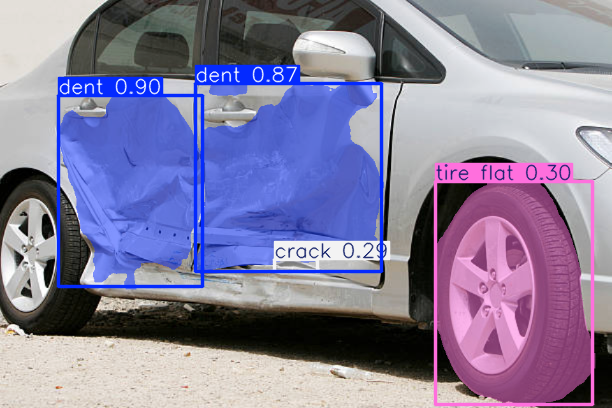

In [ ]:
from ultralytics import YOLO

# Loading the model
model = YOLO("/content/drive/MyDrive/DamageTypesegmentation/train3/weights/best.pt")

# Insert the image to the model
results = model("/content/detectionTest1.jpg")

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk